In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/kickstarter-projects/ks-projects-201801.csv
/kaggle/input/kickstarter-projects/ks-projects-201612.csv


# 1. a) Examine the state column to see unique values and counts.

In [2]:
ks2018 = pd.read_csv("/kaggle/input/kickstarter-projects/ks-projects-201801.csv", low_memory=False)
ks2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [3]:
ks2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
states = ks2018.state.value_counts()
labels = states.index
values = states.values

# 1. b) Show a pie chart of the state project count for all projects.

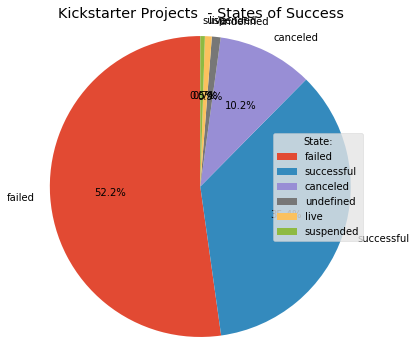

In [5]:
fig, ax = plt.subplots(figsize = (6,6))
plt.pie(values, labels = labels, startangle=90, autopct='%1.1f%%')
ax.legend(labels, title="State:", loc="right")
ax.set_title("Kickstarter Projects  - States of Success")
plt.axis("equal")
plt.show()

# 1. c) Create a new "Completed" dataframe that removes any rows with state of `live`, `undefined`, or `suspended`.

In [6]:
filt = (ks2018.state == "live")|(ks2018.state =="undefined")|(ks2018.state == "suspended")
completed = ks2018[~filt].copy()

In [7]:
completed.state.value_counts()

failed        197719
successful    133956
canceled       38779
Name: state, dtype: int64

# 2. a) What is the overall success rate for all completed kickstarter projects?

In [8]:
completed.state.value_counts(normalize=True)

failed        0.533721
successful    0.361600
canceled      0.104680
Name: state, dtype: float64

* ### Success rate of overall Projects: 36%

# 2. b) Which 5 projects were pledged the most money (usd_pledged_real)?

In [9]:
completed.head()
top5 = completed.sort_values(by="usd_pledged_real", ascending=False).head()

### these were the top 5 pledged projects:

In [10]:
top5.name

157270     Pebble Time - Awesome Smartwatch, No Compromises
250254    COOLEST COOLER: 21st Century Cooler that's Act...
216629               Pebble 2, Time 2 + All-New Pebble Core
289915                           Kingdom Death: Monster 1.5
282416         Pebble: E-Paper Watch for iPhone and Android
Name: name, dtype: object

# 2. c) Which 5 projects had the most backers?

In [11]:
top_backers = completed.sort_values(by="backers", ascending=False).head()

### these were the most backed projects:

In [12]:
top_backers.name

187652                                    Exploding Kittens
75900                         Fidget Cube: A Vinyl Desk Toy
292244    Bring Reading Rainbow Back for Every Child, Ev...
148585                      The Veronica Mars Movie Project
182657                                Double Fine Adventure
Name: name, dtype: object

# 2. d) Which year had the most competition? (# of projects) 

In [13]:
completed.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [14]:
# value counts of years --> extract year from launched col

completed['launched'] = pd.to_datetime(completed['launched'])
completed['deadline'] = pd.to_datetime(completed['deadline'])
completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370454 entries, 0 to 378660
Data columns (total 15 columns):
ID                  370454 non-null int64
name                370451 non-null object
category            370454 non-null object
main_category       370454 non-null object
currency            370454 non-null object
deadline            370454 non-null datetime64[ns]
goal                370454 non-null float64
launched            370454 non-null datetime64[ns]
pledged             370454 non-null float64
state               370454 non-null object
backers             370454 non-null int64
country             370454 non-null object
usd pledged         370222 non-null float64
usd_pledged_real    370454 non-null float64
usd_goal_real       370454 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(2), object(6)
memory usage: 45.2+ MB


In [15]:
# drop all rows with launched --> 1970!!
# Get names of indexes for which column launched has value 1970
indexNames = completed[completed['launched'].dt.year == 1970 ].index
# Delete these row indexes from dataFrame
completed.drop(indexNames , inplace=True)

In [16]:
completed.launched.dt.year.value_counts()

2015    74199
2014    66724
2016    56411
2017    49185
2013    44791
2012    41111
2011    26193
2010    10503
2009     1329
2018        2
Name: launched, dtype: int64

### 2015 was the year with the most competition /highest number of rows aka projects

# 3. a) What is the success rate for all projects broken down by main_category?

In [17]:
completed.head()
succ = (completed["state"]=="successful")

completed[succ].groupby("main_category").state.value_counts().sort_values()

main_category  state     
Journalism     successful     1012
Crafts         successful     2115
Dance          successful     2338
Photography    successful     3305
Fashion        successful     5593
Comics         successful     5842
Food           successful     6085
Technology     successful     6434
Theater        successful     6534
Design         successful    10550
Art            successful    11510
Publishing     successful    12300
Games          successful    12518
Film & Video   successful    23623
Music          successful    24197
Name: state, dtype: int64

In [18]:
succ_sum = completed[succ].name.value_counts().sum()

In [19]:
succ_sum

133956

### Success Rate per main category

In [20]:
grouped = completed.groupby(['state'])
rank_perc = 100 * completed[completed.state == 'successful'].main_category.value_counts() / grouped["main_category"].get_group("successful").count()
print(rank_perc)

Music           18.063394
Film & Video    17.634895
Games            9.344860
Publishing       9.182120
Art              8.592374
Design           7.875720
Theater          4.877721
Technology       4.803070
Food             4.542536
Comics           4.361134
Fashion          4.175252
Photography      2.467228
Dance            1.745349
Crafts           1.578877
Journalism       0.755472
Name: main_category, dtype: float64


# 3. b) Show a horizontal bar chart for project success rate by main_category, sorted by highest to lowest.

In [21]:
rank_perc.index

Index(['Music', 'Film & Video', 'Games', 'Publishing', 'Art', 'Design',
       'Theater', 'Technology', 'Food', 'Comics', 'Fashion', 'Photography',
       'Dance', 'Crafts', 'Journalism'],
      dtype='object')

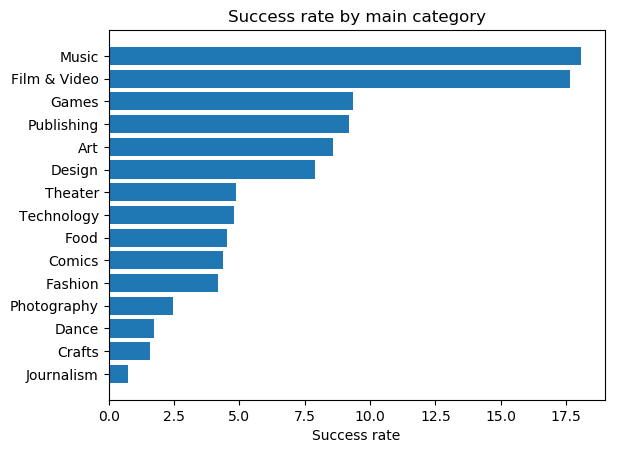

In [22]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(rank_perc.index, rank_perc.values, align='center')
ax.set_yticks(rank_perc.index)
ax.set_yticklabels(rank_perc.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Success rate')
ax.set_title('Success rate by main category')
plt.show()

# 3. c) Within the Games main_category, what is the success rate for each category within it? 

In [23]:
games = completed[completed.main_category=="Games"]

In [24]:
games.category.value_counts()

Tabletop Games     14038
Video Games        11691
Games               3171
Playing Cards       2447
Mobile Games        1752
Live Games          1012
Gaming Hardware      386
Puzzles              226
Name: category, dtype: int64

### Success rate per games category

In [25]:
g_grouped = games.groupby(['state'])
games_perc = 100 * games[games.state == 'successful'].category.value_counts() / g_grouped["category"].get_group("successful").count()
print(games_perc)

Tabletop Games     62.837514
Video Games        19.060553
Playing Cards       7.724876
Games               6.223039
Live Games          1.437929
Mobile Games        1.222240
Gaming Hardware     0.790861
Puzzles             0.702988
Name: category, dtype: float64


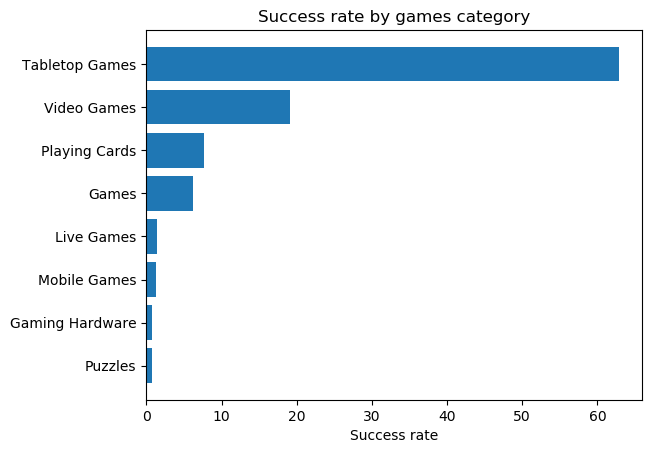

In [26]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(games_perc.index, games_perc.values, align='center')
ax.set_yticks(games_perc.index)
ax.set_yticklabels(games_perc.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Success rate')
ax.set_title('Success rate by games category')
plt.show()

# 4. a) Calculate the `pct_of_goal` for each completed project

In [27]:
completed.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [28]:
completed.loc[:,"pct_of_goal"] = ((completed["usd_pledged_real"])/(completed["usd_goal_real"])*100).copy()

In [29]:
completed.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pct_of_goal
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0.000000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,8.070000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0.488889
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0.020000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,6.579487


# 4. b) What were the top 5 projects when looking at pct_of_goal for all time?

In [30]:
completed.sort_values("pct_of_goal", ascending=False).head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pct_of_goal
369176,9509582,VULFPECK /// The Beautiful Game,Music,Music,USD,2016-10-17,1.0,2016-08-18 09:04:03,104277.89,successful,3917,US,23874.13,104277.89,1.0,10427789.0
186096,1947298033,Re-covering with Friends,Rock,Music,USD,2016-12-13,1.0,2016-10-14 19:04:27,68764.10,successful,955,US,9306.00,68764.10,1.0,6876410.0
360721,907870443,VULFPECK /// Thrill of the Arts,Music,Music,USD,2015-10-09,1.0,2015-08-10 19:31:56,55266.57,successful,1673,US,55266.57,55266.57,1.0,5526657.0
76290,1388400809,Energy Hook,Video Games,Games,USD,2013-06-10,1.0,2013-05-10 01:22:38,41535.01,successful,1622,US,41535.01,41535.01,1.0,4153501.0
81368,1413857335,Band of Brothers 2nd Chance,Tabletop Games,Games,USD,2016-08-02,1.0,2016-07-12 00:29:12,32843.00,successful,268,US,26095.00,32843.00,1.0,3284300.0


In [31]:
hundred = (completed["pct_of_goal"]<=100.00)
completed[hundred].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pct_of_goal
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0.000000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,8.070000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0.488889
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0.020000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,6.579487


In [32]:
#completed projects by perc_of_goal
completed.pct_of_goal

0          0.000000
1          8.070000
2          0.488889
3          0.020000
4          6.579487
            ...    
378656     0.050000
378657    10.333333
378658     0.133333
378659     1.333333
378660    26.200000
Name: pct_of_goal, Length: 370448, dtype: float64

In [33]:
completed.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,pct_of_goal
count,3.704480e+05,3.704480e+05,3.704480e+05,370448.000000,3.702160e+05,3.704480e+05,3.704480e+05,3.704480e+05
mean,1.074462e+09,4.864269e+04,9.753188e+03,106.920880,7.076553e+03,9.147736e+03,4.507701e+04,3.272762e+02
std,6.192028e+08,1.159877e+06,9.631620e+04,914.986385,7.882322e+04,9.166483e+04,1.128274e+06,2.697486e+04
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00
25%,5.375759e+08,2.000000e+03,3.200000e+01,2.000000,1.900000e+01,3.244000e+01,2.000000e+03,4.800000e-01
50%,1.075079e+09,5.500000e+03,6.300000e+02,12.000000,4.026550e+02,6.330000e+02,5.500000e+03,1.366667e+01
75%,1.610092e+09,1.630000e+04,4.100000e+03,57.000000,3.065000e+03,4.076000e+03,1.596224e+04,1.066667e+02
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,1.042779e+07


In [34]:
completed.state.value_counts()

failed        197719
successful    133956
canceled       38773
Name: state, dtype: int64

# 4. c) Plot a histogram distribution of all completed projects by pct_of_goal

In [35]:
bins100 = np.arange(0,110, 10)
median = completed.pct_of_goal.median() 

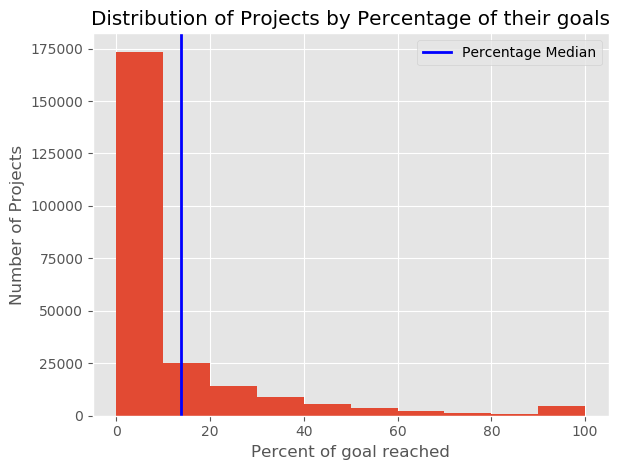

In [36]:
plt.style.use("ggplot")
plt.hist(completed.pct_of_goal, bins=bins100)
#plt.hist(np.clip(completed.pct_of_goal, 0,100), bins = bins, edgecolor="black")
plt.title("Distribution of Projects by Percentage of their goals")
plt.xlabel("Percent of goal reached")
plt.ylabel("Number of Projects")
plt.axvline(median, color="blue", label="Percentage Median", linewidth=2)
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
maxi = max(completed.pct_of_goal)
bins = np.arange(0, 110, 10)
#bins = np.append(bins, maxi)
print("lenght: ",len(bins))
print(bins)
clipped = np.clip(completed.pct_of_goal, 0,100)

print(median)

lenght:  11
[  0  10  20  30  40  50  60  70  80  90 100]
13.666666666666666


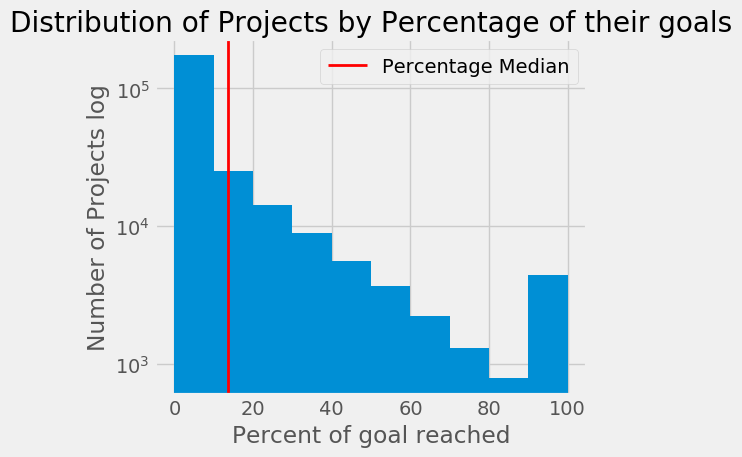

In [38]:
plt.style.use("fivethirtyeight")
plt.hist(completed.pct_of_goal, bins=bins, log=True)
#plt.hist(np.clip(completed.pct_of_goal, 110, maxi), bins = bins100, edgecolor="black")
plt.title("Distribution of Projects by Percentage of their goals")
plt.xlabel("Percent of goal reached")
plt.ylabel("Number of Projects log")
plt.axvline(median, color="red", label="Percentage Median", linewidth=2)
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
dists = completed.pct_of_goal.value_counts(bins=10)
dists

(-10427.79, 1042778.9]     370430
(1042778.9, 2085557.8]          9
(2085557.8, 3128336.7]          4
(3128336.7, 4171115.6]          2
(9385010.1, 10427789.0]         1
(6256673.4, 7299452.3]          1
(5213894.5, 6256673.4]          1
(8342231.2, 9385010.1]          0
(7299452.3, 8342231.2]          0
(4171115.6, 5213894.5]          0
Name: pct_of_goal, dtype: int64

# 4. c) Create 2 histogram subplots by pct_of_goal: 1) state=successful, and 2) all others (failed) 

In [40]:
successes = completed[succ]["pct_of_goal"]
fails = completed[~succ]["pct_of_goal"]

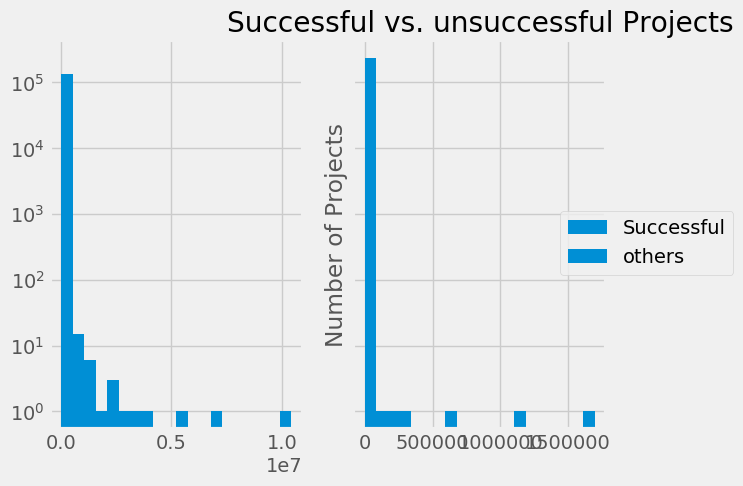

In [41]:
binss = 20
fig, axs = plt.subplots(1, 2, sharey=True)
# We can set the number of bins with the `bins` kwarg
axs[0].hist(successes, bins=binss, label="Successful", log=True)
axs[1].hist(fails, bins=binss, label="others", log=True)
plt.title("Successful vs. unsuccessful Projects")
plt.ylabel("Number of Projects")
fig.legend(loc="center right")
plt.show()

# 5. a) What is the average usd_goal_real for all completed kickstarter projects, broken down by main_category.

In [42]:
avg_usd_cat = completed.groupby("main_category")["usd_goal_real"].mean().sort_values(ascending=False)
avg_usd_cat

main_category
Technology      102154.155936
Film & Video     82378.239866
Journalism       65528.614392
Food             48661.356201
Games            45148.243871
Design           42200.736692
Art              39468.501476
Theater          27149.584643
Publishing       22590.745149
Fashion          22530.494784
Comics           19675.773316
Music            15719.399987
Photography      12266.908892
Crafts           10423.092597
Dance             9408.592117
Name: usd_goal_real, dtype: float64

# 5. b) What is the median usd_goal_real for all completed kickstarter projects, broken down by main_category.

In [43]:
med_usd_cat = completed.groupby("main_category")["usd_goal_real"].median().sort_values(ascending=False)
med_usd_cat

main_category
Technology      20000.00
Food            10000.00
Design          10000.00
Games            8000.00
Film & Video     7000.00
Fashion          5983.55
Publishing       5000.00
Journalism       5000.00
Photography      4000.00
Music            4000.00
Comics           3500.00
Dance            3310.00
Theater          3300.00
Art              3000.00
Crafts           2330.35
Name: usd_goal_real, dtype: float64

# 5. c) What is the average usd_pledged_real for all completed kickstarter projects, broken down by main_category.

In [44]:
avg_pl_cat = completed.groupby("main_category")["usd_pledged_real"].mean().sort_values(ascending = False)
avg_pl_cat

main_category
Design          24547.721421
Games           21288.432988
Technology      21186.435891
Comics           6653.781332
Film & Video     6248.348030
Fashion          5762.372201
Food             5140.292239
Theater          4017.303447
Music            3924.185239
Photography      3584.669190
Dance            3477.962203
Publishing       3398.356918
Art              3236.015895
Journalism       2641.517121
Crafts           1651.409030
Name: usd_pledged_real, dtype: float64

# 5. d) What is the median usd_pledged_real for all completed kickstarter projects, broken down by main_category.

In [45]:
med_pl_cat = completed.groupby("main_category")["usd_pledged_real"].median().sort_values(ascending = False)
med_pl_cat

main_category
Design          1926.000
Dance           1865.565
Theater         1567.000
Comics          1506.500
Games           1324.960
Music           1010.990
Film & Video     760.000
Art              431.605
Technology       317.000
Publishing       291.440
Food             260.000
Photography      245.000
Fashion          245.000
Crafts            95.000
Journalism        55.000
Name: usd_pledged_real, dtype: float64

# 5. e) What insights does this information provide?
Technology projects set the highest goal amounts, while Design projects raised the most money (pledged by crowd)

# 5. f) Based on this information, if someone wanted to choose the main_category with the highest combined success rate and pledged dollar amount, which one would you recommend?

In [46]:
# Based on this information, if someone wanted to choose the main_category with the highest combined 
# success rate and pledged dollar amount, which one would you recommend?
((completed[succ][["main_category","usd_pledged_real"]].groupby("main_category").sum())/1000000).sort_values(by="usd_pledged_real",ascending=False)

,usd_pledged_real
main_category,
Games,678.835557
Design,663.157430
Technology,598.913794
Film & Video,329.585082
Music,177.560790
Publishing,116.074002
Fashion,113.462705
Food,105.571041
Art,80.246510


### main_category with the highest combined success rate and pledged dollar amount
- calculate success rate of each main_category
 - sum of successfull projects / sum of all projects grouped by main_category --> already calculated above `rank_perc`
- calculate main_category with highest pledged dollars
 - take above result and sort by highest pledged dollars

In [47]:
cat_grouped = completed.groupby('state')
cat_perc = 100 * completed[completed.state == 'successful']["main_category"].value_counts() / completed["main_category"].value_counts()
print(cat_perc.sort_values(ascending=False))

Dance           62.580300
Theater         60.226749
Comics          54.496269
Music           49.127972
Art             41.310746
Film & Video    37.930315
Games           36.051032
Design          35.744537
Publishing      31.500499
Photography     30.960187
Food            25.077272
Fashion         24.940914
Crafts          24.419813
Journalism      21.660959
Technology      20.254998
Name: main_category, dtype: float64


## Conclusion:
while the Dance category has the highest success rate, the gaming category definitely raised the most amount of money!
### Categories by Success rate:
- Dance           62.580300
- Theater         60.221198
- Comics          54.496269
- Music           49.126974
- Art             41.309263

### Categories by most money raised:
in Mio USD:	
- Games 	    678.835557
- Design 	    663.157430
- Technology 	598.913794
- Film & Video 	329.585082
- Music 	    177.560790

To balance this out, I´d say that "Music" has a good chance both in raising money and in terms of success!

# 6. a)Create a new column `months` that shows how many months the project was active between launch and deadline.

In [48]:
# columns to use: deadline - launched = months (new col)
completed.loc["deadline"] = pd.to_datetime(completed['deadline'], yearfirst=True)

In [49]:
#completed.info()
completed["months"] = (completed["deadline"] - completed["launched"]).copy()
completed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370449 entries, 0 to deadline
Data columns (total 17 columns):
ID                  370448 non-null object
name                370445 non-null object
category            370448 non-null object
main_category       370448 non-null object
currency            370448 non-null object
deadline            370448 non-null datetime64[ns]
goal                370448 non-null float64
launched            370448 non-null datetime64[ns]
pledged             370448 non-null float64
state               370448 non-null object
backers             370448 non-null object
country             370448 non-null object
usd pledged         370216 non-null float64
usd_pledged_real    370448 non-null float64
usd_goal_real       370448 non-null float64
pct_of_goal         370448 non-null float64
months              370448 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(6), object(8), timedelta64[ns](1)
memory usage: 50.9+ MB


# 6. b) Compare the avg months for successful projects vs non-successful. Add visuals if you'd like.
on average it took successful projects 31 days (1 month) to be completed

In [50]:
succ_months = (completed[completed.state=="successful"]["months"]).describe()
succ_months

count                     133956
mean     31 days 14:05:32.862215
std      11 days 18:44:12.217088
min              0 days 00:07:17
25%             29 days 00:02:16
50%      29 days 11:11:43.500000
75%             33 days 14:22:05
max             91 days 16:20:08
Name: months, dtype: object

### Avg months for non-successful projects:
on average it took unsuccessful projects 34 days to fail

In [51]:
successful = (completed.state=="successful")
fail_months = completed[~successful]["months"].describe()
fail_months

count                     236492
mean     34 days 17:50:17.099593
std      13 days 04:45:35.688856
min              0 days 00:51:07
25%             29 days 03:09:24
50%      29 days 18:02:17.500000
75%      39 days 10:05:37.750000
max             91 days 23:06:13
Name: months, dtype: object

# 6. c) Does the length of a project in months seem to have an impact?  
looking at the statistics below it doesn´t seem to have a significant impact:
- successful projects had a max-runtime of 91 days (3 months)
- unsucessful projects have a max-runtime of 91 days (3 months)


# Let's zoom in on Games: Video Games (main_category: category)

# 7. a) Calculate the expected value for the Games: Video Games category, with the expected value defined as (median of usd_pledged_real)* (success rate of completed projects).

In [52]:
# isolate the video games:
vg = games[games.category == "Video Games"].copy()
# calculate success rate:
total_vg = vg.shape[0]
total_vg
vg_succ = vg[vg.state == "successful"].shape[0]/total_vg
vg_succ
# Success rate of video games: 20.40 %

#calculate expected value:
exp_val = vg[vg.state == "successful"].usd_pledged_real.median()*vg_succ
exp_val
# expected value of the video game category: USD 2291.49

2291.4906440851937

# 7. b) Do this again but broken down by deadline year

In [53]:
# broken down by deadline year:
# extract the year from deadline
dl_year = vg.deadline.dt.year
vg["dl_year"] = dl_year

# 7. c) Show this in a bar chart

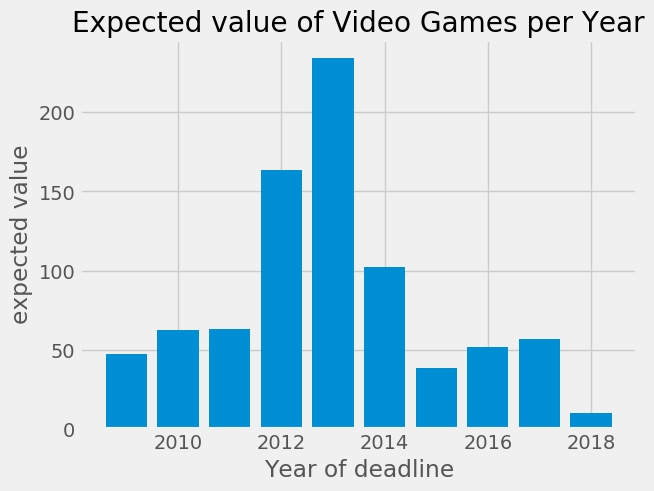

In [54]:
# group by year:
exp_v_yr = vg.groupby("dl_year")["usd_pledged_real"].median()*vg_succ
plt.bar(exp_v_yr.index, exp_v_yr.values)
plt.ylabel("expected value")
plt.xlabel("Year of deadline")
plt.title("Expected value of Video Games per Year")
plt.show()

# 7. d) What insights does this data provide you? 
The years 2012 to 2014 seemed to have been the best years for video game projects
Top year by far was 2015 with the highest expected value

# Let's zoom in on personal planners

# 8. a) Calculate the project count, success rate, and pct_of_goal for all projects with 'planner' in the name. Check for spelling variations in upper/lowercase.

In [55]:

# remove Null values from Name column:
completed.name.dropna(inplace=True)
completed.name.isna().sum()

0

In [56]:
# check for rows with planner in name:
completed["planner"] = completed.name.str.contains("planner", case=False).copy()
#--> 356 rows with planner in name
planner = completed[completed.planner == True].copy()

In [57]:
planner.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pct_of_goal,months,planner
3119,1016125600,RICH Living Weekly Planner 2018,Calendars,Publishing,AUD,2017-10-16,22000.0,2017-09-24 22:10:36,10826.0,failed,138,AU,736.14,8498.31,17269.80,49.209082,21 days 01:49:24,True
4586,1023441131,Fertility in Focus | An IVF Planner,Product Design,Design,USD,2017-09-28,12500.0,2017-08-29 15:43:20,1020.0,failed,18,US,0.00,1020.00,12500.00,8.160000,29 days 08:16:40,True
4693,1023899010,The Boss Planner: An Outspoken Guide to Gettin...,Calendars,Publishing,USD,2016-10-30,18286.0,2016-09-30 18:00:38,21421.0,successful,390,US,8241.00,21421.00,18286.00,117.144263,29 days 05:59:22,True
6242,1031903516,ALPHA PLANNER,Design,Design,EUR,2016-12-01,13000.0,2016-11-01 17:53:09,112.0,failed,7,ES,73.46,119.19,13834.64,0.861533,29 days 06:06:51,True
6792,1034554436,The Ultimate Bucket List Planner - Time to Get...,Graphic Design,Design,GBP,2015-08-31,985.0,2015-08-03 17:03:06,66.0,failed,7,GB,103.10,100.49,1499.79,6.700271,27 days 06:56:54,True


#### Project count: 356

In [58]:
# success rate = no. of successful projects / total no. of projects
planner[succ].name.count()/planner.name.count()
# success rate = 35.96%

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


0.3595505617977528

#### Success rate: 35.96%

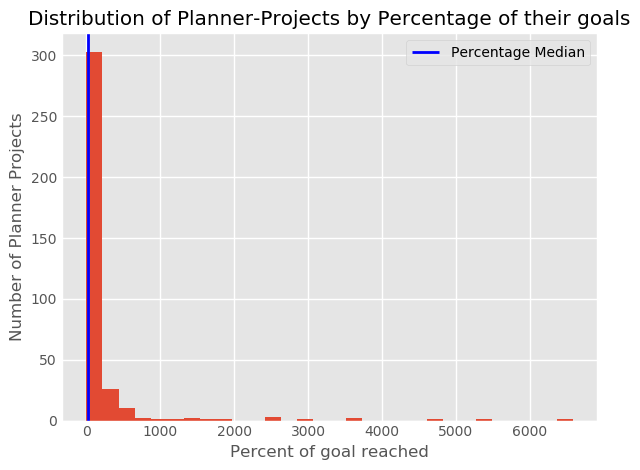

In [59]:
median1 = planner.pct_of_goal.median()
plt.style.use("ggplot")
plt.hist(planner.pct_of_goal, bins=30)

plt.title("Distribution of Planner-Projects by Percentage of their goals")
plt.xlabel("Percent of goal reached")
plt.ylabel("Number of Planner Projects")
plt.axvline(median1, color="blue", label="Percentage Median", linewidth=2)
plt.legend()
plt.tight_layout()
plt.show()

# 8. b) How about all projects with both 'planner' and 'Panda' in the name?
only one project :-)

In [60]:
planner["panda"] = planner.name.str.contains("panda", case=False).copy()
#--> 356 rows with planner in name
panda = planner[planner.panda == True].copy()

In [61]:
panda

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pct_of_goal,months,planner,panda
374940,980774782,Panda Planner Pro: Happiness + Productivity = ...,Product Design,Design,USD,2016-04-02,10000.0,2016-02-29 17:00:53,26944.0,successful,829,US,26944.0,26944.0,10000.0,269.44,32 days 06:59:07,True,True
